## Cargar datos

In [21]:
import pandas as pd

In [22]:
datos = pd.read_csv("data/datos-arbol.csv", sep=" ")
datos = pd.get_dummies(datos, drop_first=True)
datos

,Min_dia,LLam_dia,Min_Inter,N_Reclam,Llam_Inter,Plan_Inter_yes,Flag_Fuga_yes
1,137.6,113,10.7,1,2,False,True
2,158.7,112,8.3,2,1,True,True
3,258.3,76,13.6,1,4,False,True
4,307.2,65,10.2,2,4,False,True
5,208.4,102,10.1,1,8,False,True
...,...,...,...,...,...,...,...
496,124.1,92,13.7,0,3,False,False
497,221.4,124,11.8,3,1,False,False
498,245.1,66,3.1,1,4,False,False
499,135.7,111,9.5,1,4,False,False


## Dividir datos en entrenamiento y prueba

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Asegúrate de usar el nombre correcto de la columna objetivo después de la codificación
X = datos.drop('Flag_Fuga_yes', axis=1)  # Cambiar 'Flag_Fuga' a 'Flag_Fuga_yes'
y = datos['Flag_Fuga_yes']  # Cambiar 'Flag_Fuga' a 'Flag_Fuga_yes'

In [25]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## Construir el árbol de clasificación

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [27]:
# Construir el árbol de clasificación
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

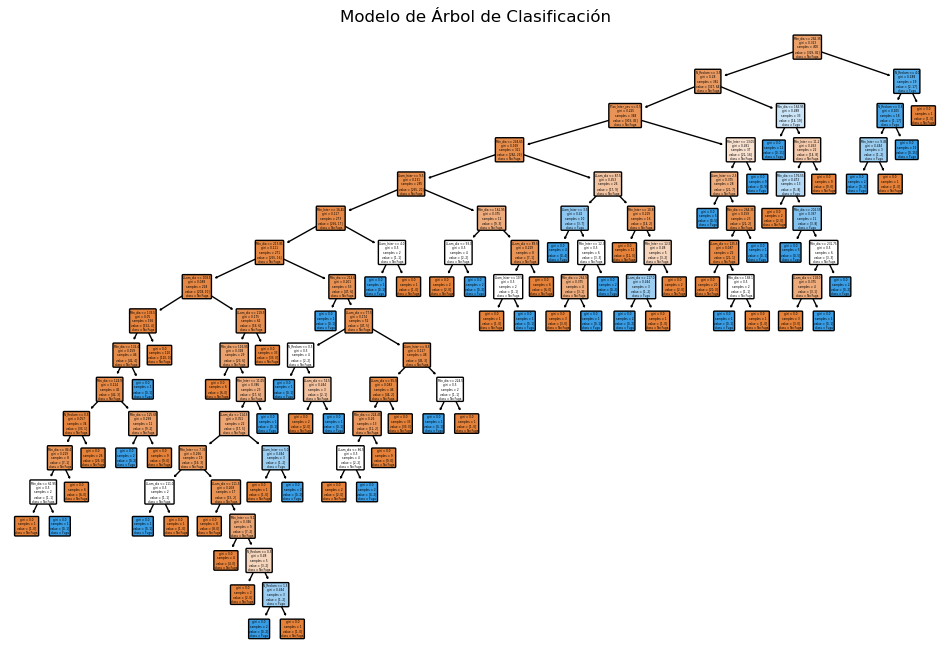

In [28]:
# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(arbol, feature_names=list(X.columns), class_names=['No Fuga', 'Fuga'], filled=True, rounded=True)
plt.title("Modelo de Árbol de Clasificación")
plt.show()

## Evaluar el modelo

In [29]:
from sklearn import metrics

In [30]:
pred = arbol.predict(X_test)
prob = arbol.predict_proba(X_test)[:, 1]

In [31]:
# Matriz de confusión
mc = metrics.confusion_matrix(y_test, pred)
print(mc)

[[63 18]
 [ 3 16]]


In [32]:
# Tasa de precisión
ta = metrics.accuracy_score(y_test, pred)
print("Tasa de precisión:", ta)

Tasa de precisión: 0.79


In [33]:
# AUC-ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.8099415204678363


## Poda del árbol

In [34]:
import numpy as np

In [35]:
# Construcción y poda del árbol
arbol = DecisionTreeClassifier(ccp_alpha=0.01)  # ccp_alpha es el parámetro de complejidad
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [36]:
# Encontrar el parámetro de complejidad óptimo
path = arbol.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
impurities = path.impurities

# Seleccionar el alpha óptimo
optimal_alpha = alphas[np.argmax(impurities)]

# Podar el árbol con el alpha óptimo
pruned_arbol = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
pruned_arbol.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.047793412418842274)

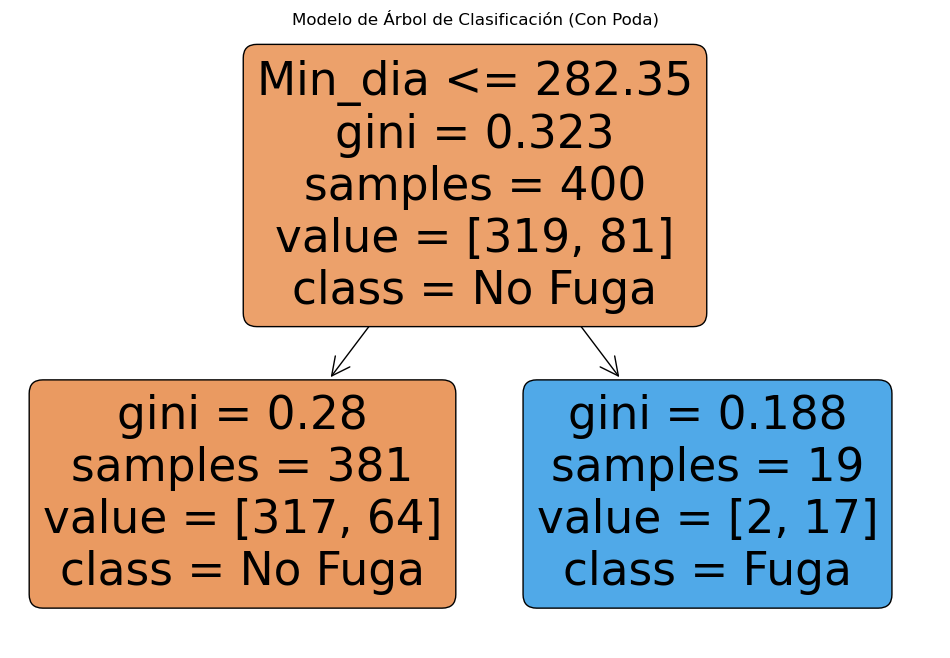

In [37]:
# Visualizar el árbol podado
plt.figure(figsize=(12, 8))
plot_tree(pruned_arbol, feature_names=list(X.columns), class_names=['No Fuga', 'Fuga'], filled=True, rounded=True)
plt.title("Modelo de Árbol de Clasificación (Con Poda)")
plt.show()

In [38]:
# Evaluar el modelo podado
pred_pruned = pruned_arbol.predict(X_test)
prob_pruned = pruned_arbol.predict_proba(X_test)[:, 1]

# Matriz de confusión del árbol podado
mc_pruned = metrics.confusion_matrix(y_test, pred_pruned)
print(mc_pruned)

[[78  3]
 [14  5]]


In [39]:
# Tasa de precisión del árbol podado
ta_pruned = metrics.accuracy_score(y_test, pred_pruned)
print("Tasa de precisión del árbol podado:", ta_pruned)

Tasa de precisión del árbol podado: 0.83


In [40]:
# AUC-ROC del árbol podado
fpr_pruned, tpr_pruned, thresholds_pruned = metrics.roc_curve(y_test, prob_pruned)
auc_pruned = metrics.auc(fpr_pruned, tpr_pruned)
print("AUC del árbol podado:", auc_pruned)

AUC del árbol podado: 0.6130604288499025
